In [1]:
import psycopg2
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

fm.fontManager.addfont('config/NanumSquareR.ttf')
prop = fm.FontProperties(fname='config/NanumSquareR.ttf')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

box_kwargs = dict(boxprops=dict(alpha=0.5), fliersize = 0)
strip_kwargs = dict(size=10)
bar_kwargs = dict(capsize = 0.1)
cormap_kwargs = dict(annot = True, cmap='coolwarm', vmin=-1, vmax=1)

In [3]:
def find_df(sql):
    # Define connection parameters
    conn = psycopg2.connect(
        host="postgres_db",  # Container name as defined in docker-compose.yml
        database="mydatabase",
        user="myuser",
        password="mypassword"
    )
    # Query data from one of the tables
    # df = pd.read_sql("SELECT * FROM  tn_visit_area_info LIMIT 5;", conn)
    df = pd.read_sql(sql, conn)
    # Close the connection
    df.columns = [x.upper() for x in df.columns]
    conn.close()
    return df
sql = "SELECT * FROM  tn_visit_area_info;"
df = find_df(sql)

/tmp/ipykernel_1154/892014231.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


In [4]:
sql ="SELECT * FROM tc_codea"
codea_df = find_df(sql)

sql ="SELECT * FROM tc_codeb"
codeb_df = find_df(sql)

sql ="SELECT * FROM tc_sgg"
sgg_df = find_df(sql)

/tmp/ipykernel_1154/892014231.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


In [5]:
codeb_df.query('CD_A in ["VIS"]')

,IDX,CD_A,CD_B,CD_NM,CD_MEMO,CD_MEMO2,DEL_FLAG,ORDER_NUM,INS_DT,EDIT_DT
221,1088,VIS,21,집,,,N,999,2022-07-05 15:52:47,NaT
222,1089,VIS,22,친구/친지집,,,N,999,2022-07-05 15:52:56,2022-07-26 16:05:56
223,1090,VIS,23,사무실,,,N,999,2022-07-05 15:53:05,NaT
224,1091,VIS,24,숙소,,,N,999,2022-07-05 15:53:12,NaT
225,1095,VIS,13,체험 활동 관광지,,,N,15,2022-07-14 15:14:57,NaT
226,1002,VIS,1,자연관광지,,,N,10,2022-07-05 10:48:17,NaT
227,1003,VIS,2,"역사/유적/종교 시설(문화재, 박물관, 촬영지, 절 등)",,,N,20,2022-07-05 10:48:24,NaT
228,1005,VIS,3,"문화 시설(공연장, 영화관, 전시관 등)",,,N,30,2022-07-05 11:23:34,NaT
229,1006,VIS,4,"상업지구(거리, 시장, 쇼핑시설)",,,N,40,2022-07-05 11:23:39,NaT
230,1007,VIS,5,"레저/스포츠 관련 시설(스키, 카트, 수상레저)",,,N,50,2022-07-05 11:23:47,NaT


In [6]:
codeb_df.query('CD_A in ["REN"]')

,IDX,CD_A,CD_B,CD_NM,CD_MEMO,CD_MEMO2,DEL_FLAG,ORDER_NUM,INS_DT,EDIT_DT
143,1032,REN,1,지명도/명소/핫플레이스,,,N,999,2022-07-05 11:28:35,NaT
144,1033,REN,2,"온라인(SNS, 블로그 등) 평가가 좋아서",,,N,999,2022-07-05 11:28:42,NaT
145,1034,REN,3,미디어(TV 정보 프로그램 등) 평가가 좋아서,,,N,999,2022-07-05 11:28:47,NaT
146,1035,REN,4,과거 경험이 좋아서,,,N,999,2022-07-05 11:28:54,NaT
147,1036,REN,5,지인의 추천이 있어서,,,N,999,2022-07-05 11:29:01,NaT
148,1037,REN,6,가기 편해서/교통이 좋아서,,,N,999,2022-07-05 11:29:09,NaT
149,1038,REN,7,편의시설/서비스가 좋아서,,,N,999,2022-07-05 11:29:36,NaT
150,1039,REN,8,가성비가 좋아서,,,N,999,2022-07-05 11:29:44,NaT
151,1040,REN,9,지나가다 우연히,,,N,999,2022-07-05 11:29:51,NaT
152,1041,REN,10,교육성이 좋아서,,,N,999,2022-07-05 11:29:59,NaT


In [7]:

sql = """
WITH ren_code AS (
    SELECT 
        CD_B
        ,CD_NM
    FROM 
        tc_codeb 
    WHERE 
        CD_A='REN'
)
,visit_area_ifo AS (
SELECT 
    TRAVEL_ID
    ,VISIT_ORDER
    ,VISIT_AREA_NM
    ,ROAD_NM_ADDR, LOTNO_ADDR
    ,X_COORD AS LON, Y_COORD AS LAT
    ,VISIT_CHC_REASON_CD
    ,CASE WHEN MAX(CASE WHEN VISIT_CHC_REASON_CD = '9' THEN 1 ELSE 0 END) OVER(PARTITION BY TRAVEL_ID ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) =1 THEN 'P' ELSE 'J' END AS JP
    ,DGSTFN
    ,REVISIT_INTENTION
    ,RCMDTN_INTENTION
    ,SGG_CD
FROM  
    tn_visit_area_info
WHERE 
    CAST(VISIT_AREA_TYPE_CD AS INT)<20
)

SELECT
    TRAVEL_ID
    ,VISIT_ORDER
    ,VISIT_AREA_NM
    ,ROAD_NM_ADDR, LOTNO_ADDR
    ,CAST(DGSTFN AS INT)-3 AS SATIFACTION
    ,CAST(REVISIT_INTENTION AS INT)-3 AS REVISIT 
    ,CAST(RCMDTN_INTENTION AS INT)-3 AS RCMDTN
    ,LON, LAT
    ,VISIT_CHC_REASON_CD
    ,CD_NM AS VISIT_REASON
    ,SGG_CD
    ,JP
FROM 
    visit_area_ifo
    LEFT JOIN ren_code 
        ON ren_code.CD_B = visit_area_ifo.VISIT_CHC_REASON_CD

"""
df0 = find_df(sql)
df0

/tmp/ipykernel_1154/892014231.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,ROAD_NM_ADDR,LOTNO_ADDR,SATIFACTION,REVISIT,RCMDTN,LON,LAT,VISIT_CHC_REASON_CD,VISIT_REASON,SGG_CD,JP
0,e_e000004,3,창룡문,None,경기 수원시 팔달구 남수동,1,1,1,127.0251435,37.287791,1,지명도/명소/핫플레이스,None,J
1,e_e000004,4,수원 화성 화홍문,None,경기 수원시 팔달구 북수동 9000-1,1,0,0,127.0176261,37.2875455,10,교육성이 좋아서,None,J
2,e_e000004,2,화성 관광열차 안내소 연무대 매표소,경기 수원시 팔달구 창룡대로103번길 20,경기 수원시 팔달구 매향동 3-32,1,0,1,127.0233392,37.2878779,10,교육성이 좋아서,None,J
3,e_e000006,4,경춘선 자전거길,None,경기 가평군 청평면 하천리 158-2,2,2,2,127.4362,37.7459577,4,과거 경험이 좋아서,None,J
4,e_e000006,5,베이커리 시어터,경기 남양주시 화도읍 경춘로2696번길 4-15,경기 남양주시 화도읍 구암리 6-8,1,1,1,127.3760252,37.6734389,1,지명도/명소/핫플레이스,None,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14475,g_g010556,5,오이도 빨강등대,경기 시흥시 오이도로 170,경기 시흥시 정왕동 2043,2,2,2,126.6875106,37.3454554,1,지명도/명소/핫플레이스,None,P
14476,h_h003275,3,내동마을 연꽃 단지,경기 용인시 처인구 원삼면 내동로23번길 6,경기 용인시 처인구 원삼면 사암리 827,0,1,0,127.2968058,37.1759976,2,"온라인(SNS, 블로그 등) 평가가 좋아서",None,J
14477,h_h003275,5,삼성화재 모빌리티 뮤지엄,경기 용인시 처인구 포곡읍 에버랜드로376번길 171,경기 용인시 처인구 포곡읍 유운리 432,2,2,2,127.21693,37.3003599,4,과거 경험이 좋아서,None,J
14478,h_h003275,4,외할머니 집,경기 용인시 처인구 양지면 중부대로 2545-3,경기 용인시 처인구 양지면 제일리 34-1,0,-1,0,127.3189883,37.2422219,2,"온라인(SNS, 블로그 등) 평가가 좋아서",None,J


In [8]:
df0.query('JP!="P"').sort_values('VISIT_CHC_REASON_CD')

,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,ROAD_NM_ADDR,LOTNO_ADDR,SATIFACTION,REVISIT,RCMDTN,LON,LAT,VISIT_CHC_REASON_CD,VISIT_REASON,SGG_CD,JP
0,e_e000004,3,창룡문,None,경기 수원시 팔달구 남수동,1,1,1,127.0251435,37.287791,1,지명도/명소/핫플레이스,None,J
7211,e_e004281,3,수원 KT 소닉붐 아레나,경기 수원시 권선구 서수원로577번길 171,경기 수원시 권선구 금곡동 1071,2,2,2,126.948291,37.2762725,1,지명도/명소/핫플레이스,None,J
7213,e_e004281,5,수원 KT 소닉붐 아레나,경기 수원시 권선구 서수원로577번길 171,경기 수원시 권선구 금곡동 1071,2,2,2,126.948291,37.2762725,1,지명도/명소/핫플레이스,None,J
7235,e_e004294,4,스타필드 시티 위례,경기 하남시 위례대로 200,경기 하남시 학암동 660,2,2,2,127.148402,37.4801106,1,지명도/명소/핫플레이스,None,J
7236,e_e004294,5,개울 테라스,경기 광주시 남한산성면 남한산성로 212-5,경기 광주시 남한산성면 오전리 309-1,2,2,2,127.2295446,37.4560049,1,지명도/명소/핫플레이스,None,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,e_e004941,7,빽다방 일산 라페스타점,경기 고양시 일산동구 무궁화로 31-2,경기 고양시 일산동구 장항동 734-2,1,0,0,126.7678227,37.6629367,8,가성비가 좋아서,None,J
11304,e_e007538,7,메가 MGC 커피 중대 후문점,서울 동작구 흑석로 21,서울 동작구 상도동 7-60,2,2,2,126.9530872,37.5050857,8,가성비가 좋아서,None,J
11312,e_e007538,5,중앙대학교 서울캠퍼스,서울 동작구 흑석로 84,서울 동작구 흑석동 221,2,2,2,126.9550496,37.5048774,8,가성비가 좋아서,None,J
12635,e_e009106,4,오포 한우마을,경기 광주시 능평로 110,경기 광주시 능평동 262-3,1,0,0,127.1700856,37.3496932,8,가성비가 좋아서,None,J


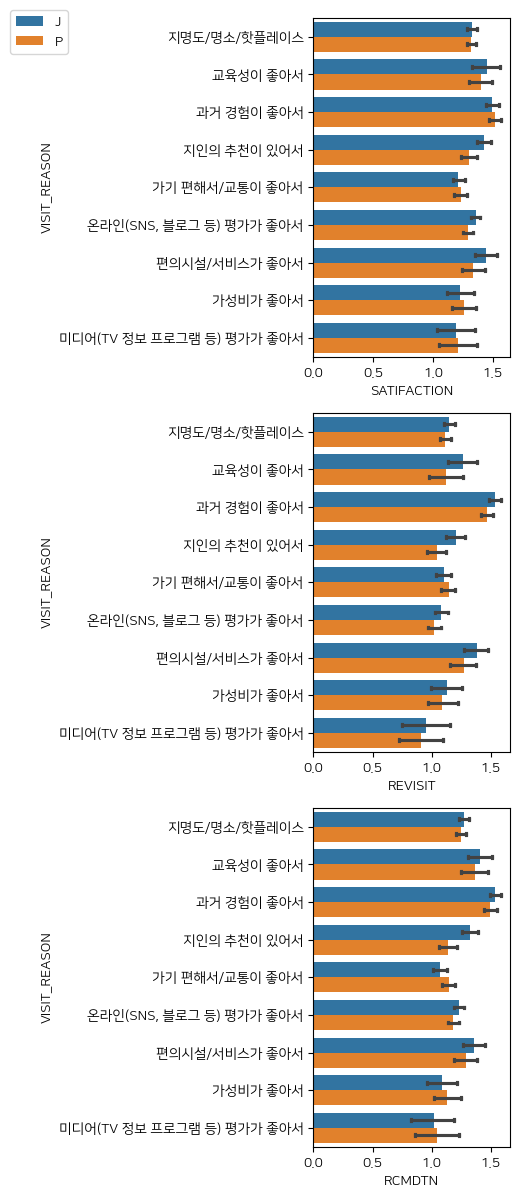

In [9]:
fig, axes = plt.subplots(nrows = 3, sharey=True, figsize=(5,12), tight_layout=True)
sns.barplot(df0.query('VISIT_CHC_REASON_CD not in ["9", "11"]'), x='SATIFACTION', y='VISIT_REASON',hue = 'JP', ax=axes[0], capsize=0.1)
sns.barplot(df0.query('VISIT_CHC_REASON_CD not in ["9", "11"]'), x='REVISIT', y='VISIT_REASON',hue = 'JP', ax=axes[1], capsize=0.1)
sns.barplot(df0.query('VISIT_CHC_REASON_CD not in ["9", "11"]'), x='RCMDTN', y='VISIT_REASON',hue = 'JP', ax=axes[2], capsize=0.1)
for idx, ax in enumerate(axes):
    if idx==0:
        h, l = ax.get_legend_handles_labels()
    ax.legend().remove()
fig.legend(h, l, bbox_to_anchor = (0.1,1))
plt.show()


In [10]:
df0.groupby('VISIT_REASON').agg(
    cnt = ('VISIT_AREA_NM', 'count'),
    mean_satis = ('SATIFACTION', 'mean'),
    sd_satis = ('SATIFACTION', 'std'),
    mean_revisit = ('REVISIT', 'mean'),
    sd_revisit = ('REVISIT', 'std'),
    mean_rcmd = ('RCMDTN', 'mean'),
    sd_rcmd = ('RCMDTN', 'std')
)

,cnt,mean_satis,sd_satis,mean_revisit,sd_revisit,mean_rcmd,sd_rcmd
VISIT_REASON,,,,,,,
가기 편해서/교통이 좋아서,1848,1.221861,0.797613,1.125541,0.925742,1.111472,0.901493
가성비가 좋아서,433,1.244804,0.836177,1.108545,0.981187,1.110855,0.923809
과거 경험이 좋아서,1416,1.506356,0.703320,1.505650,0.694224,1.517655,0.668080
교육성이 좋아서,347,1.429395,0.739122,1.204611,0.900341,1.391931,0.753983
기타,724,1.237569,0.847368,1.059392,1.007885,1.089779,0.963486
미디어(TV 정보 프로그램 등) 평가가 좋아서,232,1.202586,0.871577,0.931034,1.082918,1.034483,1.001566
"온라인(SNS, 블로그 등) 평가가 좋아서",2874,1.322547,0.820465,1.052540,1.027479,1.208072,0.903174
지나가다 우연히,1894,1.089229,0.821631,0.749208,1.020620,0.829461,0.981045
지명도/명소/핫플레이스,3204,1.322722,0.826184,1.132647,0.977841,1.262172,0.867741
